<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,25.834898,45.534066,53.407391,37.298406,0.001443,172.076204,172.074501,0.001703
1,0.0,1.0,99.687763,28.220194,56.918625,62.407318,-0.001734,257.232166,257.233886,-0.001720
2,0.0,2.0,36.887118,45.196679,26.799149,89.048690,-0.000884,207.930752,207.931736,-0.000984
3,0.0,3.0,35.432353,26.807756,81.573440,35.412468,-0.001075,189.224942,189.225729,-0.000788
4,0.0,4.0,68.513739,66.093250,62.254429,72.519810,-0.000184,279.381044,279.381324,-0.000280
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,84.195905,75.981998,22.490936,48.107237,-0.000231,240.775846,240.775814,0.000032
59996,999.0,56.0,57.091459,23.218608,81.073459,72.271473,0.003012,243.658011,243.655504,0.002507
59997,999.0,57.0,31.687079,36.526663,55.277043,27.927145,0.003824,161.421754,161.418245,0.003509
59998,999.0,58.0,94.083361,84.131805,94.804424,98.334129,-0.000617,381.353101,381.353497,-0.000395


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,25.834898,45.534066,53.407391,37.298406,0.001443,172.076204,172.074501,0.001703
1,0.0,1.0,99.687763,28.220194,56.918625,62.407318,-0.001734,257.232166,257.233886,-0.001720
2,0.0,2.0,36.887118,45.196679,26.799149,89.048690,-0.000884,207.930752,207.931736,-0.000984
3,0.0,3.0,35.432353,26.807756,81.573440,35.412468,-0.001075,189.224942,189.225729,-0.000788
4,0.0,4.0,68.513739,66.093250,62.254429,72.519810,-0.000184,279.381044,279.381324,-0.000280
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,84.195905,75.981998,22.490936,48.107237,-0.000231,240.775846,240.775814,0.000032
59996,999.0,56.0,57.091459,23.218608,81.073459,72.271473,0.003012,243.658011,243.655504,0.002507
59997,999.0,57.0,31.687079,36.526663,55.277043,27.927145,0.003824,161.421754,161.418245,0.003509
59998,999.0,58.0,94.083361,84.131805,94.804424,98.334129,-0.000617,381.353101,381.353497,-0.000395


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    25.834898  45.534066  53.407391  37.298406  0.001443  172.076204   
      1.0    99.687763  28.220194  56.918625  62.407318 -0.001734  257.232166   
      2.0    36.887118  45.196679  26.799149  89.048690 -0.000884  207.930752   
      3.0    35.432353  26.807756  81.573440  35.412468 -0.001075  189.224942   
      4.0    68.513739  66.093250  62.254429  72.519810 -0.000184  279.381044   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   84.195905  75.981998  22.490936  48.107237 -0.000231  240.775846   
      56.0   57.091459  23.218608  81.073459  72.271473  0.003012  243.658011   
      57.0   31.687079  36.526663  55.277043  27.927145  0.003824  161.421754   
      58.0   94.083361  84.131805  94.804424  98.334129 -0.000617  381.353101   
      59.0   26.027398  95.420889  64.546861  44.979916  0.000126  240.975191   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    172.074501  0.001703  
      1.0    257.233886 -0.001720  
      2.0    207.931736 -0.000984  
      3.0    189.225729 -0.000788  
      4.0    279.381324 -0.000280  
...                 ...       ...  
999.0 55.0   240.775814  0.000032  
      56.0   243.655504  0.002507  
      57.0   161.418245  0.003509  
      58.0   381.353497 -0.000395  
      59.0   240.975024  0.000166  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    25.834898  45.534066  53.407391  37.298406  0.001443  172.076204   
      1.0    99.687763  28.220194  56.918625  62.407318 -0.001734  257.232166   
      2.0    36.887118  45.196679  26.799149  89.048690 -0.000884  207.930752   
      3.0    35.432353  26.807756  81.573440  35.412468 -0.001075  189.224942   
      4.0    68.513739  66.093250  62.254429  72.519810 -0.000184  279.381044   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   84.195905  75.981998  22.490936  48.107237 -0.000231  240.775846   
      56.0   57.091459  23.218608  81.073459  72.271473  0.003012  243.658011   
      57.0   31.687079  36.526663  55.277043  27.927145  0.003824  161.421754   
      58.0   94.083361  84.131805  94.804424  98.334129 -0.000617  381.353101   
      59.0   26.027398  95.420889  64.546861  44.979916  0.000126  240.975191   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    172.074501  0.001703  
      1.0    257.233886 -0.001720  
      2.0    207.931736 -0.000984  
      3.0    189.225729 -0.000788  
      4.0    279.381324 -0.000280  
...                 ...       ...  
999.0 55.0   240.775814  0.000032  
      56.0   243.655504  0.002507  
      57.0   161.418245  0.003509  
      58.0   381.353497 -0.000395  
      59.0   240.975024  0.000166  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,25.834898,45.534066,53.407391,37.298406,0.001443,172.076204,172.074501,0.001703
1,0.0,1.0,99.687763,28.220194,56.918625,62.407318,-0.001734,257.232166,257.233886,-0.001720
2,0.0,2.0,36.887118,45.196679,26.799149,89.048690,-0.000884,207.930752,207.931736,-0.000984
3,0.0,3.0,35.432353,26.807756,81.573440,35.412468,-0.001075,189.224942,189.225729,-0.000788
4,0.0,4.0,68.513739,66.093250,62.254429,72.519810,-0.000184,279.381044,279.381324,-0.000280
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,84.195905,75.981998,22.490936,48.107237,-0.000231,240.775846,240.775814,0.000032
59996,999.0,56.0,57.091459,23.218608,81.073459,72.271473,0.003012,243.658011,243.655504,0.002507
59997,999.0,57.0,31.687079,36.526663,55.277043,27.927145,0.003824,161.421754,161.418245,0.003509
59998,999.0,58.0,94.083361,84.131805,94.804424,98.334129,-0.000617,381.353101,381.353497,-0.000395


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    25.834898  45.534066  53.407391  37.298406  0.001443  172.076204   
      1.0    99.687763  28.220194  56.918625  62.407318 -0.001734  257.232166   
      2.0    36.887118  45.196679  26.799149  89.048690 -0.000884  207.930752   
      3.0    35.432353  26.807756  81.573440  35.412468 -0.001075  189.224942   
      4.0    68.513739  66.093250  62.254429  72.519810 -0.000184  279.381044   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   84.195905  75.981998  22.490936  48.107237 -0.000231  240.775846   
      56.0   57.091459  23.218608  81.073459  72.271473  0.003012  243.658011   
      57.0   31.687079  36.526663  55.277043  27.927145  0.003824  161.421754   
      58.0   94.083361  84.131805  94.804424  98.334129 -0.000617  381.353101   
      59.0   26.027398  95.420889  64.546861  44.979916  0.000126  240.975191   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    172.074501  0.001703  
      1.0    257.233886 -0.001720  
      2.0    207.931736 -0.000984  
      3.0    189.225729 -0.000788  
      4.0    279.381324 -0.000280  
...                 ...       ...  
999.0 55.0   240.775814  0.000032  
      56.0   243.655504  0.002507  
      57.0   161.418245  0.003509  
      58.0   381.353497 -0.000395  
      59.0   240.975024  0.000166  

[60000 rows x 8 columns]

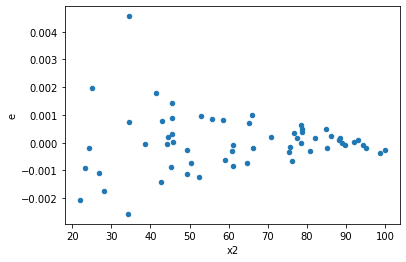

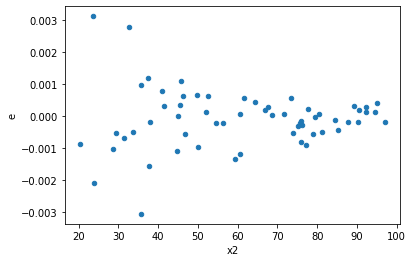

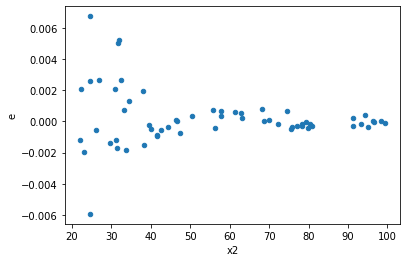

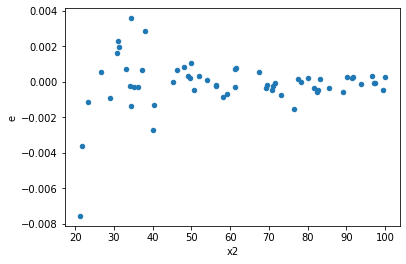

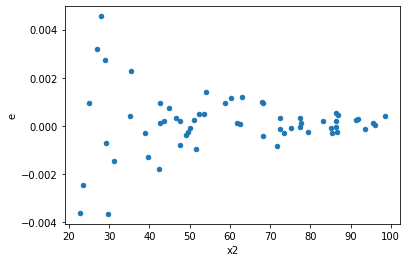

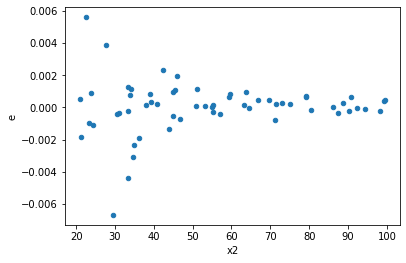

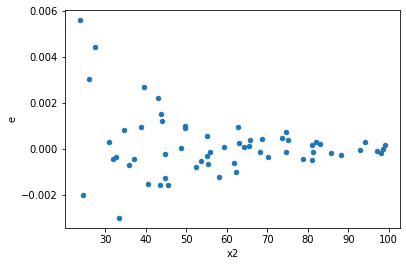

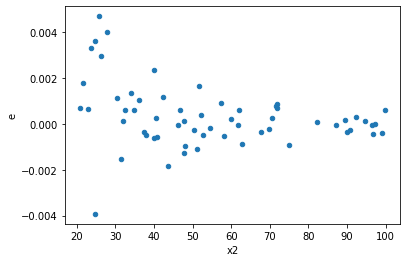

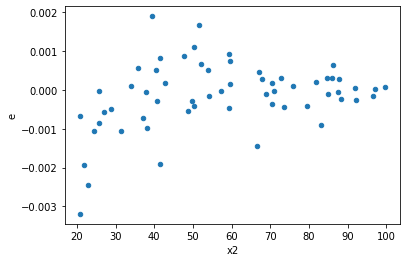

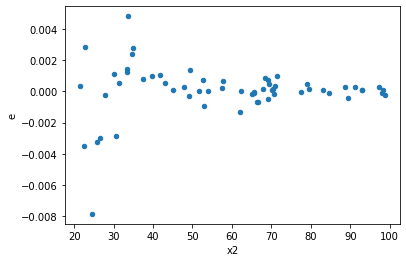

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,20.0,20.0,1.8088490054436992e-05,2.2522950219589135e-05,9.044245027218497e-07,1.1261475109794567e-06,1.2451536945210302,0.628589776206236,0.685705111896882,0.314294888103118,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,5.023587454901157e-05,6.065839421155732e-05,2.5117937274505784e-06,3.032919710577866e-06,1.2074716476245924,0.6773920625475138,0.6613039687262431,0.3386960312737569,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,9.18139284127235e-06,1.0526508290986744e-05,4.5906964206361754e-07,5.263254145493372e-07,1.1465045089529127,0.7628058809684513,0.6185970595157744,0.3814029404842256,Reject001=1 : Homoscedasticity
19.0,20.0,20.0,3.0270666891823204e-05,4.2717699530467356e-05,1.5135333445911602e-06,2.135884976523368e-06,1.4111912262496729,0.44798936132286427,0.7760053193385679,0.22399468066143213,Reject001=1 : Homoscedasticity
30.0,20.0,20.0,6.651059835278552e-05,6.982882238642768e-05,3.325529917639276e-06,3.491441119321384e-06,1.0498901545892225,0.9143866364938145,0.5428066817530928,0.45719331824690723,Reject001=1 : Homoscedasticity
62.0,20.0,20.0,4.740418289003374e-05,5.2658507329068224e-05,2.370209144501687e-06,2.6329253664534114e-06,1.110840945222561,0.8164773043752294,0.5917613478123853,0.4082386521876147,Reject001=1 : Homoscedasticity
64.0,20.0,20.0,1.23072024832826e-05,1.5232016462236411e-05,6.1536012416413e-07,7.616008231118206e-07,1.237650593863773,0.6380664742110216,0.6809667628944892,0.3190332371055108,Reject001=1 : Homoscedasticity
68.0,20.0,20.0,3.821493872350184e-05,5.649612519894894e-05,1.910746936175092e-06,2.824806259947447e-06,1.4783780135752078,0.38943890775515033,0.8052805461224248,0.19471945387757517,Reject001=1 : Homoscedasticity
73.0,20.0,20.0,1.8779395611683e-05,2.0053203111737078e-05,9.3896978058415e-07,1.0026601555868538e-06,1.0678300583465858,0.8847779951411414,0.5576110024294293,0.4423889975705707,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,1.8088490054436992e-05,2.2522950219589135e-05,9.044245027218497e-07,1.1261475109794567e-06,1.2451536945210302,0.628589776206236,Reject001=1 : Homoscedasticity
1.0,20.0,20.0,2.7337527345969324e-05,3.669418803362152e-06,1.3668763672984662e-06,1.834709401681076e-07,0.13422643375620347,3.589693782822224e-05,Reject001=0 : Heteroscedasticity
2.0,20.0,20.0,0.0001170512086306365,2.2845273296397664e-05,5.8525604315318255e-06,1.1422636648198832e-06,0.1951733225454131,0.0005923025193966465,Reject001=0 : Heteroscedasticity
3.0,20.0,20.0,2.5023145974863644e-05,1.1667590819386702e-05,1.2511572987431821e-06,5.833795409693351e-07,0.4662719400313246,0.09583985400574359,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,5.0451329058132754e-05,1.6169782094726625e-05,2.522566452906638e-06,8.084891047363313e-07,0.32050259917028007,0.014273402509982262,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,5.023587454901157e-05,6.065839421155732e-05,2.5117937274505784e-06,3.032919710577866e-06,1.2074716476245924,0.6773920625475138,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,5.2258325165064206e-05,2.6970994381012406e-06,2.6129162582532102e-06,1.3485497190506204e-07,0.05161090466604369,9.939196619497718e-09,Reject001=0 : Heteroscedasticity
7.0,20.0,20.0,4.151447961700514e-05,9.390819240539429e-06,2.075723980850257e-06,4.6954096202697144e-07,0.22620587629123903,0.0016373137724960325,Reject001=0 : Heteroscedasticity
8.0,20.0,20.0,9.18139284127235e-06,1.0526508290986744e-05,4.5906964206361754e-07,5.263254145493372e-07,1.1465045089529127,0.7628058809684513,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    621
Reject001=1 : Homoscedasticity      379
Name: Result_test, dtype: int64